<a href="https://colab.research.google.com/github/matheusgsaraiva/Airbnb_Lyon_proj/blob/main/10_2_Projeto_1_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Lyon*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/france/auvergne-rhone-alpes/lyon/2022-03-12/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* id - código de referência do imóvel;
* name - nome do imóvel;
* host_id - código de referência do anfitrião;
* host_name - nome do anfitrião;
* neighbourhood_group - esta coluna não contém valor válido;
* neihgnourhood - nome do bairro do imóvel;
* latitude - coordenada da latitude (y) do imóvel;
* longitude - coordenada da longitude (x) do imóvel;
* room_type - tipo de imóvel (imóvel completo ou quarto separado);
* price - preço da estadia;
* minimum_nights - quantidade mínima de noites para reservar;
* number_of_reviews - número de reviews que o imóvel recebeu;
* last_review - data do último review;
* reviews_per_month - número de reviews por mês;
* calculated_host_listings_count - número de anúncios do mesmo anfitrião;
* availability_365 - número de dias disponíveis no período de um ano.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,56766,Amazing duplex-terrace in old Lyon,269557,Isabelle,NaN,5e Arrondissement,45.76312,4.82813,Entire home/apt,120,30,55,2018-09-04,0.40,1,109,0,"Available with a mobility lease only (""bail mo..."
1,77104,Nice Flat in the center of Lyon,411285,Clementine,NaN,1er Arrondissement,45.76842,4.82745,Entire home/apt,70,2,20,2019-12-08,0.15,1,315,0,6938113058353
2,134539,"Centre of old town,home sweet home",660135,Polali,NaN,5e Arrondissement,45.75930,4.82548,Entire home/apt,80,2,118,2020-09-30,0.91,1,88,0,6938513221658
3,136556,At home near Les Halles Paul Bocuse,668524,Nathalie,NaN,3e Arrondissement,45.76346,4.85338,Entire home/apt,99,3,2,2021-06-10,0.02,1,74,1,0693831600055
4,137132,"Bel apartment, 2 rooms, Lyon center",670404,Sandrine,NaN,6e Arrondissement,45.76996,4.85332,Entire home/apt,88,3,20,2019-12-28,0.16,1,182,0,0693861800177


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("O conjunto de dados possui {:,} linhas.".format(df.shape[0]).replace(',', '.'))
print("E {} variáveis (colunas).\n".format(df.shape[1]))
# verificar o tipo das variáveis do dataset
print("Segue abaixo o nome e o tipo das {} variáveis:\n".format(df.shape[1]))
df.dtypes

O conjunto de dados possui 9.337 linhas.
E 18 variáveis (colunas).

Segue abaixo o nome e o tipo das 18 variáveis:



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

As variáveis com maior problema de valores ausentes são:

* neighbourhood_group - todos os valores estão ausentes (100 %);
* license - mais da metade dos valores estão ausentes (56 %);
* reviews_per_month e last_review - um quinto dos valores estão ausentes (20 %).

Para a variável license, valores ausentes representam um grande problema, pois segundo o Airbnb eles significam imóveis não-licenciados. Isso significa que os anfitriões estão se beneficiando da plataforma sem estarem devidamente dentro da lei local.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
( ( df.isnull().sum() / df.shape[0] ) * 100 ).sort_values(ascending = False)

neighbourhood_group               100.000000
license                            56.345721
reviews_per_month                  20.306308
last_review                        20.306308
host_name                           0.053550
name                                0.032130
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

Como a variável neighbourhood_group só apresenta valores ausentes, ela será removida do conjunto de dados.

In [ ]:
# Removendo a coluna da variável neighbourhood_group
df.drop(columns=['neighbourhood_group'], inplace=True)

In [ ]:
# ver preços por bairros, na média
df['neighbourhood'].value_counts()

3e Arrondissement     1647
7e Arrondissement     1448
1er Arrondissement    1395
2e Arrondissement     1193
6e Arrondissement      914
5e Arrondissement      867
4e Arrondissement      671
8e Arrondissement      656
9e Arrondissement      546
Name: neighbourhood, dtype: int64

\### **Q3. Qual o tipo de distribuição das variáveis?** 

Com os dados brutos, ou seja, sem fazer nenhum tipo de tratamento percebe-se que o conjunto de dados sofre um grande influência dos outliers haja vista que a distribuição dos dados não fica em um formato de distribuição normal.
Apenas as variáveis de coordenadas apresentam um formato mais próximo de uma curva normal, o que pode ser explicado pela concentração dos imóveis em determinadas regiões.

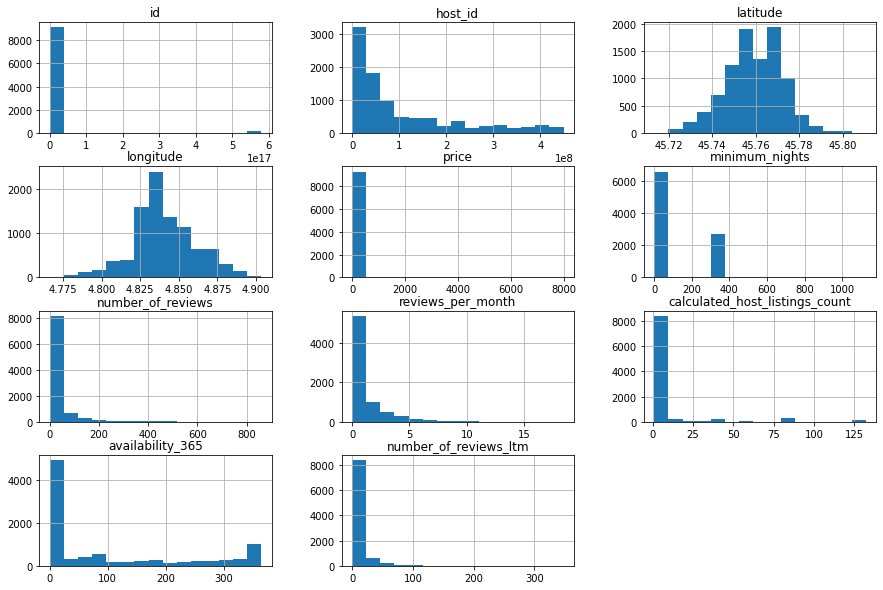

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

# #### **Remoção dos outliers**

Para diminuir o efeito dos outliers no conjunto de dados é necessário removê-los. 
De acordo com histograma gerado acima, verifica-se uma grande influência dos outliers nas seguintes variáveis:

* id;
* host_id;
* price;
* minimum_nights;
* number_of_reviews;
* reviews_per_month;
* calculated_host_listings_count;
* availability_365;
* number of reviews_ltm.

No entanto, como se trata de dados de Airbnb há variáveis que apresentam um grau de importância maior quando se leva em consideração imóveis. Essas variáveis seriam: price e minimum_nights.


In [ ]:
# ver o resumo estatístico das variáveis escolhidas para remoção de outliers
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,9337.000000,9337.000000
mean,94.247189,108.596658
std,179.176912,164.923751
min,0.000000,1.000000
25%,47.000000,1.000000
50%,70.000000,2.000000
75%,100.000000,365.000000
max,8000.000000,1125.000000


Observando o resumo estatístico das variáveis pode-se confirmar a hipótese da influência dos outliers, pois:

* variável price possui 75% do valor abaixo de 100 euros, no entanto seu maior valor corresponde a 8000 euros;
* variável minimum_nights possui 75% do valor abaixo de 365 dias (1 ano) enquanto que o seu valor máximo corresponde a mais que o triplo. Isso pode implicar que na cidade de Lyon, a população costuma utilizar a plataforma como alternativa a aluguéis mais longos.

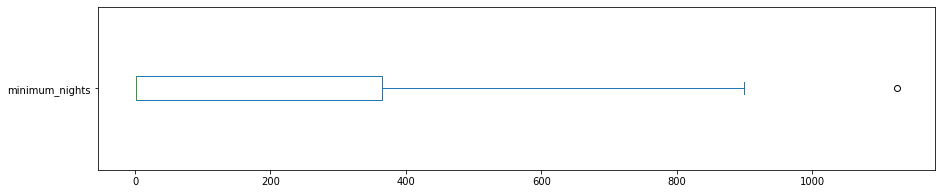

minimum_nights: valores acima de 750:
4 entradas
0.0428%


In [ ]:
# plotando o boxplot da variável minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 750 dias para minimum_nights
print("minimum_nights: valores acima de 750:")
print("{:,} entradas".format(len(df[df.minimum_nights > 750])).replace(',','.'))
print("{:.4f}%".format( (len(df[df.minimum_nights > 750]) / df.shape[0]) * 100 ))

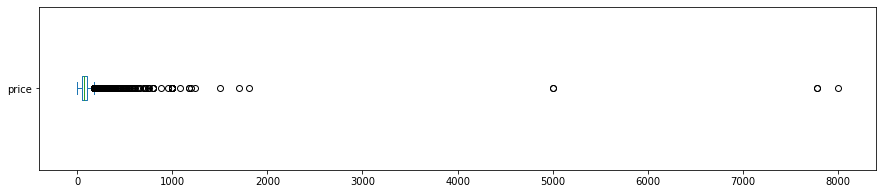

price: valores acima de 200:
782 entradas
8.3753%


In [ ]:
# plotando o boxplot da variável price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 180 euros para price
print("price: valores acima de 180:")
print("{} entradas".format(len(df[df.price > 180])))
print("{:.4f}%".format( (len(df[df.price > 180]) / df.shape[0]) * 100 ))

#### Histograma sem outliers
Agora os outliers serão removidos conforme a seguinte condição para as duas variáveis escolhidas:

* minimum_nights > 90 dias;
* price > 180 euros.

O número de linhas após a remoção dos outliers corresponde a 8.551.

Foram removidas 786 linhas.


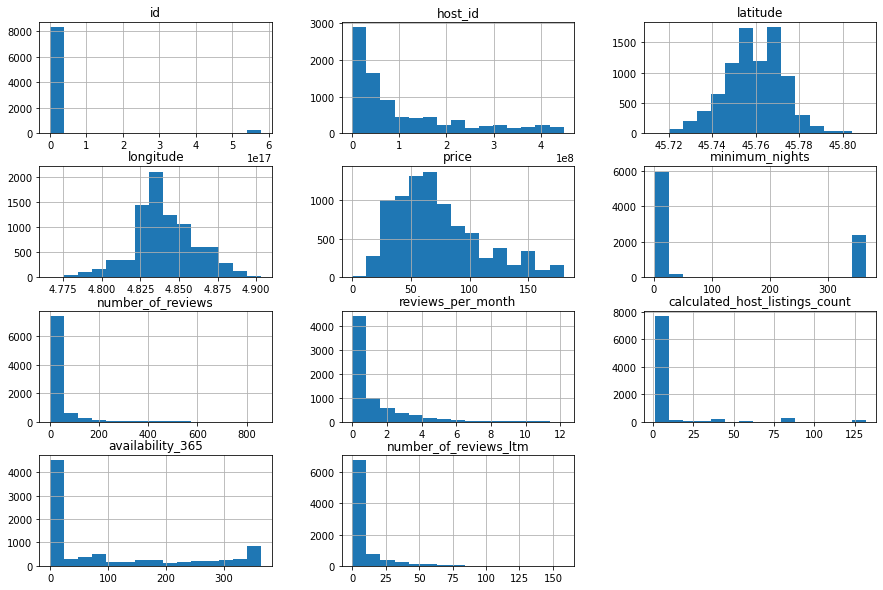

In [ ]:
# remover os outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > 750].index, axis = 0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 180].index, axis = 0, inplace=True)

# número de entradas
print("O número de linhas após a remoção dos outliers corresponde a {:,}.\n".format(df_clean.shape[0]).replace(',', '.'))
print("Foram removidas {:,} linhas.".format(df.shape[0]-df_clean.shape[0]).replace(',', '.'))

# plotar o histograma sem outliers
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
df_clean.price.describe()

count    8551.000000
mean       72.052742
std        36.538611
min         0.000000
25%        45.000000
50%        65.000000
75%        90.000000
max       180.000000
Name: price, dtype: float64

In [ ]:
# ver a média da coluna 'price'
media = df_clean.price.mean()

print("A média dos preços de aluguel equivale a € {:.2f}".format(media))

A média dos preços de aluguel equivale a € 72.05


### **Q4. Qual a correlação existente entre as variáveis**

Para verificar a correlação será criado uma matriz de correlação e um mapa de calor.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.065719,-0.021731,0.043851,0.035972,0.115998
minimum_nights,0.065719,1.000000,-0.206843,-0.329191,-0.175518,-0.366734
number_of_reviews,-0.021731,-0.206843,1.000000,0.674835,0.014392,0.177830
reviews_per_month,0.043851,-0.329191,0.674835,1.000000,0.206825,0.325514
calculated_host_listings_count,0.035972,-0.175518,0.014392,0.206825,1.000000,0.293327
availability_365,0.115998,-0.366734,0.177830,0.325514,0.293327,1.000000


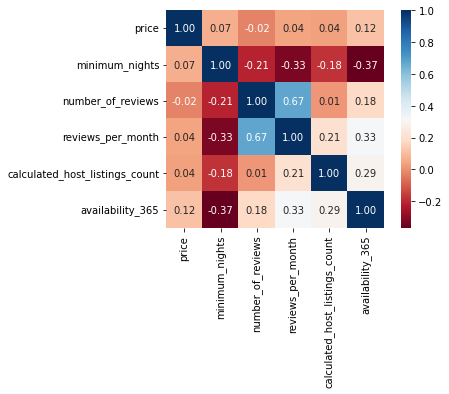

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Como pode ser visto a partir da tabela e do mapa de calor, a variável minimum_nights é a que apresenta uma certa correlação inversamente proporcional com as variáveis reviews_per_month e availability_365.
Isso significa que quanto mais reviews um imóvel possuir menor será o número de dias que esse imóvel é alugado, o que faz sentido pois significa que há diferentes clientes alugando no mesmo mês.
O mesmo vale para disponibilidade de dias no ano, quanto mais dias disponíveis tem um imóvel em um ano, maior é a possibilidade dele ser alugado por curto período de dias.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    6268
Private room       2188
Shared room          69
Hotel room           26
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean['room_type'].value_counts() / df_clean.shape[0]

Entire home/apt    0.733014
Private room       0.255877
Shared room        0.008069
Hotel room         0.003041
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
2e Arrondissement     82.944554
1er Arrondissement    78.405751
6e Arrondissement     75.971831
4e Arrondissement     75.610114
5e Arrondissement     74.901639
3e Arrondissement     67.724363
7e Arrondissement     65.497440
9e Arrondissement     64.960474
8e Arrondissement     60.000000
Name: price, dtype: float64

In [ ]:
# ver as entradas do 2e Arrondissement
df_bairro_mais_caro = df_clean[df_clean.neighbourhood == '2e Arrondissement']

print("O bairro 2e Arrondissement é o bairro mais caro e possui {} anúncios.\n".format(df_bairro_mais_caro.shape[0]))

media_mais_caro = df_bairro_mais_caro.price.mean()

print("E sua média de preço equivale a {:.2f}\n".format(media_mais_caro))

df_bairro_mais_caro.head()

O bairro 2e Arrondissement é o bairro mais caro e possui 1010 anúncios.

E sua média de preço equivale a 82.94



,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
16,403747,FULL City CENTER Lyon Bellecour,2013310,Boris,2e Arrondissement,45.75865,4.83353,Entire home/apt,70,2,567,2022-03-06,4.70,3,100,19,6938213215209
19,551810,Charming rooftop house terrace and view Fourviere,2711663,Julie Et Michael,2e Arrondissement,45.76489,4.83140,Entire home/apt,114,4,39,2021-10-21,0.47,1,172,1,6938112369158
32,758266,Chambre Presqu'île,3994549,Florian,2e Arrondissement,45.75293,4.83113,Private room,90,1,13,2015-08-28,0.15,1,0,0,NaN
66,1134118,Cozy duplex in the heart of Lyon,392555,Quentin-Alexandre,2e Arrondissement,45.74888,4.82966,Entire home/apt,99,30,192,2021-10-10,1.79,2,273,3,6938213051396
94,1463170,appartement centre Lyon Confluence,4855390,Marie,2e Arrondissement,45.74321,4.81803,Entire home/apt,55,365,111,2019-08-16,1.06,1,179,0,NaN


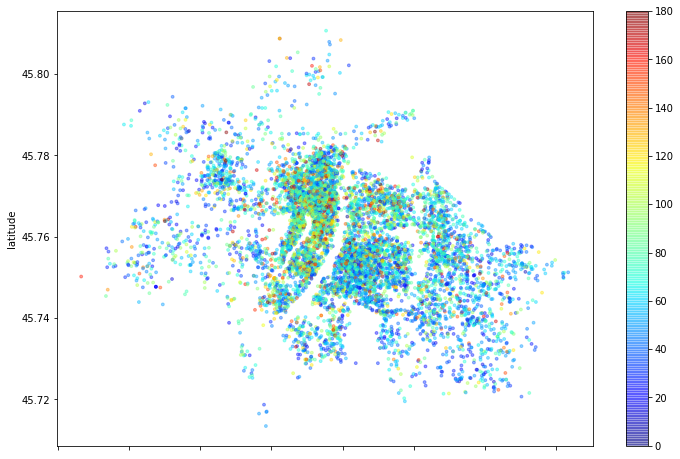

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna 'minimum_nights'
df_clean.minimum_nights.mean()

print("A média do mínimo de noites para aluguel é: {:.0f} noites.".format(df_clean.minimum_nights.mean()))

A média do mínimo de noites para aluguel é: 104 noites.


## Conclusões


Baseando-se no que foi visto percebe-se que o Airbnb em Lyon é usado para longos períodos de dias e não somente para o final de semana. Isso foi verificado pela variável minimum_nights que apresentou mediana de 2 noites e 75% dos anúncios menores que 365 dias.
Além disso, verifica uma grande quantidade de imóveis com preços acima de 180 euros a noite, próximo a 10% do número total das entradas.
